In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = "data/"

In [2]:
# loading data
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

In [3]:
def plot_boxplox(data_time, data_temp, labels, title):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    bp = ax1.boxplot(data_time, labels=labels, notch=True, bootstrap=10000)
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='b')
    
    ax2 = ax2.twinx()
    bp = ax2.boxplot(data_temp, labels=labels, notch=True, bootstrap=10000)
    ax2.set_ylabel('temperature (°C)', color='r', )
    ax2.tick_params('y', colors='r')
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='r')
        
    plt.show()

In [69]:
def plot_data(timestamp, time, temp, limits, title):
    fig, ax1 = plt.subplots()

    maxtime = timestamp[-1:]

    ymin1 = limits[0]
    ymax1 = limits[1]
    ax1.plot(timestamp, time, 'b-')
    ax1.set_xlabel('experiment time (min) - (duration: %.2f min)' %(maxtime))
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim([ymin1, ymax1])

    ymin2 = limits[2]
    ymax2 = limits[3]
    ax2 = ax1.twinx()
    ax2.plot(timestamp, temp, 'r')
    ax2.set_ylabel('temperature (°C)', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim([ymin2, ymax2])
    
    ax1.set_title(title)

    plt.show()

In [5]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


In [41]:
path_zero_lts = "data/performance/rockpi_s/stretch_4.4.143/"

**Standard Stretch Kernel**

In [43]:
# loading data standard armbian kernel multi-thread solution

kernel_std_rock_pi_mt = load_csv_data("multithread_output.csv", path_zero_lts)
kernel_std_rock_pi_mt['time'] -= kernel_std_rock_pi_mt['time'][0]


In [44]:
# loading data standard armbian kernel single-thread solution

kernel_std_rock_pi_st = load_csv_data("singlethread_output.csv", path_zero_lts)
kernel_std_rock_pi_st['time'] -= kernel_std_rock_pi_st['time'][0]

**Standard Stretch Kernel 4.4.143**

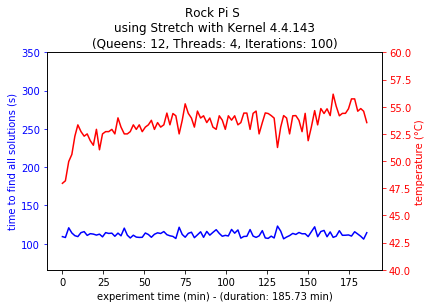

In [71]:
# plotting standard armbian kernel with orange-pi multi-thread solution
timestamp_std_rock_pi_mt = kernel_std_rock_pi_mt.time/60
time_std_rock_pi_mt = kernel_std_rock_pi_mt.seconds + kernel_std_rock_pi_mt.microseconds/1000000
temp_std_rock_pi_mt = (kernel_std_rock_pi_mt.cpu_temp + kernel_std_rock_pi_mt.gpu_temp)/2
title = "Rock Pi S \nusing Stretch with Kernel 4.4.143\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_std_rock_pi_mt[:100], time_std_rock_pi_mt[:100], temp_std_rock_pi_mt[:100], (66, 350, 40, 60), title)

In [72]:
print("Time to 50 iterations: %.2f" %timestamp_std_rock_pi_mt[49])

Time to 50 iterations: 91.85


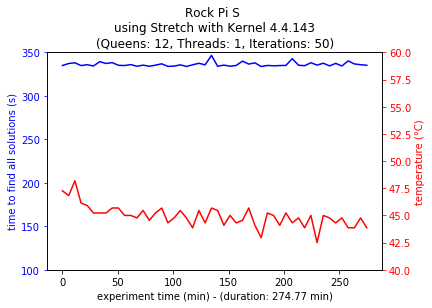

In [73]:
# plotting standard armbian kernel with orange-pi single-thread solution
timestamp_std_rock_pi_st = kernel_std_rock_pi_st.time/60
time_std_rock_pi_st = kernel_std_rock_pi_st.seconds + kernel_std_rock_pi_st.microseconds/1000000
temp_std_rock_pi_st = (kernel_std_rock_pi_st.cpu_temp + kernel_std_rock_pi_st.gpu_temp)/2
title = "Rock Pi S \nusing Stretch with Kernel 4.4.143\n(Queens: 12, Threads: 1, Iterations: 50)"

plot_data(timestamp_std_rock_pi_st[:50], time_std_rock_pi_st[:50], temp_std_rock_pi_st[:50], (100, 350, 40, 60), title)

In [75]:
print("Time to 50 iterations: %.2f" %timestamp_std_rock_pi_st[49])

Time to 50 iterations: 274.77


In [76]:
# multi-thread vs single-thread
mt_timing_std_rock_pi = (time_std_rock_pi_st[:49,None]/time_std_rock_pi_mt[:49,None])

print("Multi-thread Rock-Pi-S: %.2f" % (np.mean(mt_timing_std_rock_pi)))
print("Multi-thread Rock-Pi-S: %.2f | Single-thread Orange-Pi: %.2f" % (np.mean(time_std_rock_pi_mt), np.mean(time_std_rock_pi_st)))

Multi-thread Rock-Pi-S: 3.00
Multi-thread Rock-Pi-S: 112.32 | Single-thread Orange-Pi: 336.14


In [77]:
max_std_mt_rock_pi_temp = np.max(temp_std_rock_pi_mt)
max_std_st_rock_pi_temp = np.max(temp_std_rock_pi_st)

print("Max. temp. MT %.2f " % (max_std_mt_rock_pi_temp))
print("Max. temp. ST %.2f " % (max_std_st_rock_pi_temp))

Max. temp. MT 56.16 
Max. temp. ST 48.19 
